In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


# Experiment 1: K - Means Clustering Implementation on Iris Dataset


In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [3]:
import numpy as np

print(iris_dataset)

print("--------------------------------")
print("Keys of the dataset:", iris_dataset.keys())

print("--------------------------------")
print("Feature names:", iris_dataset.feature_names)

print("--------------------------------")
print("Target names:", iris_dataset.target_names)

print("--------------------------------")
print("Shape of data:", iris_dataset.data.shape)

print("--------------------------------")
print("Shape of target:", iris_dataset.target.shape)

print("--------------------------------")
print("Number of missing values:", np.isnan(iris_dataset.data).sum())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X = iris_dataset.data

<ipython-input-5-b2f4d1394668>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 3], c='blue', cmap='viridis', edgecolor='k', s=50)


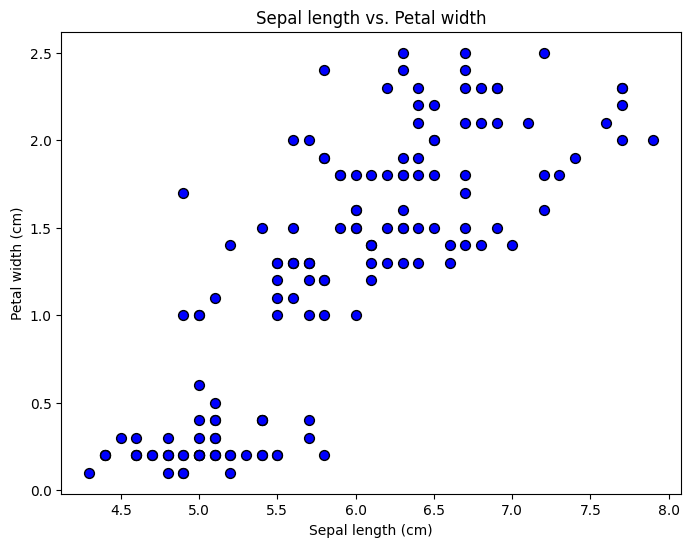

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


plt.scatter(X[:, 0], X[:, 3], c='blue', cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal length vs. Petal width')

plt.show()

### Step 1: Choose the number of clusters k

In [6]:
K=3

### Step 2: Select k random points from the data as centroids

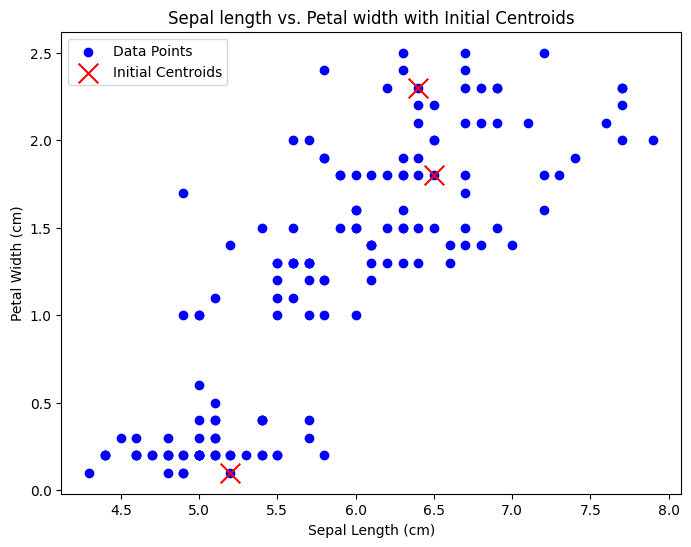

In [7]:
import random as rand
import numpy as np

centroids = []
for i in range(K):
    centroid = X[rand.randint(0, 149)]
    centroids.append(centroid)

centroids = np.array(centroids)  # Convert centroids to a numpy array

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c='blue', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 3], c='red', marker='x', s=200, label='Initial Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal length vs. Petal width with Initial Centroids')
plt.legend()
plt.show()


## Step 3: Assign all data points to the closest center

In [8]:
def assign_cluster(X, centroids):
    assignments = []

    for data_point in X:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)

        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

## Step 4: Compute the new centroids

In [9]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

## Step 5: Compute Sum of Squared Errors

In [10]:
def sse(all_vals, assignments, centroids):
    errors = []

    for i in range(len(all_vals)):

        centroid = centroids[assignments[i]]


        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))


        errors.append(error**2)

    sse = sum(errors)

    return sse

## Step 6: Given a set of assignments of points to clusters, compute the new centroids for every cluster, by taking the mean of all the points assigned to each cluster.

In [11]:
def kmeans_clustering(all_vals, centroids,K,max_iter = 100, tol = pow(10,-3)):
    it = -1
    all_sse = []
    assignments = []


    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)

        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)

        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)


    return (assignments, centroids, all_sse, it)

In [12]:
result = kmeans_clustering(X, centroids, K)

In [13]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))]
centroids_y = [result[1][x][3] for x in range(len(result[1]))]

In [14]:
SL = X[:, 0]
PW = X[:, 3]
assignments = result[0]

Text(0, 0.5, 'Petal Width')

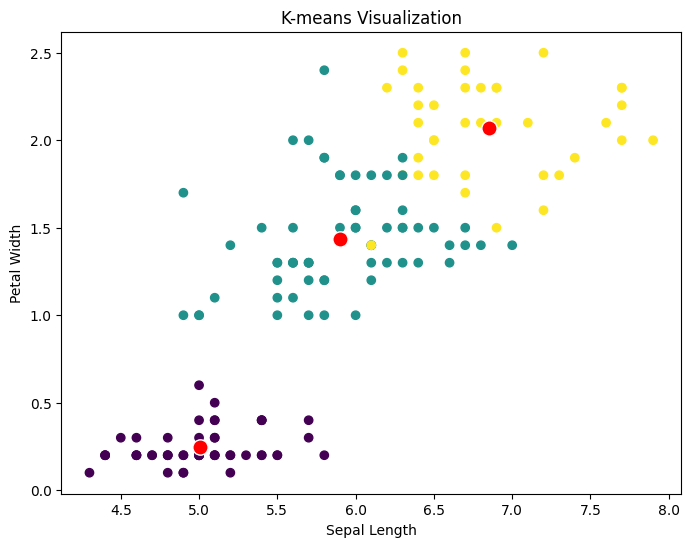

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(SL, PW, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)
plt.title("K-means Visualization")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

# Experiment 2: PCA Implementation on Housing Prices Dataset


In [16]:
from sklearn.datasets import fetch_openml


dataset = fetch_openml(name='boston', version=1)


print(dataset.keys())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [17]:
print(dataset.data.head())

print("-----------------------------")

print(dataset.data.info())

print("-----------------------------")

print(dataset.data.describe())

print("-----------------------------")

print(dataset.data.columns)




      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float6

In [18]:
import pandas

X_hd = dataset.data
y_hd = dataset.target

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_hd)
X_s = scaler.transform(X_hd)

In [20]:
import numpy as np

class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):

        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale


        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)


        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T

        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.n_components,:]


        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj

In [21]:
my_pca = MyPCA(n_components = 2).fit(X_s)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X_s)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432203]]
Explained variance ratio from scratch:
 [0.47129606357274634, 0.11025193247588039]
Cumulative explained variance from scratch:
 [0.47129606 0.581548  ]
Transformed data shape from scratch: (506, 2)


# Experiment 3: PCA Implementation on Images using Scikit Learn




(183, 275, 4)


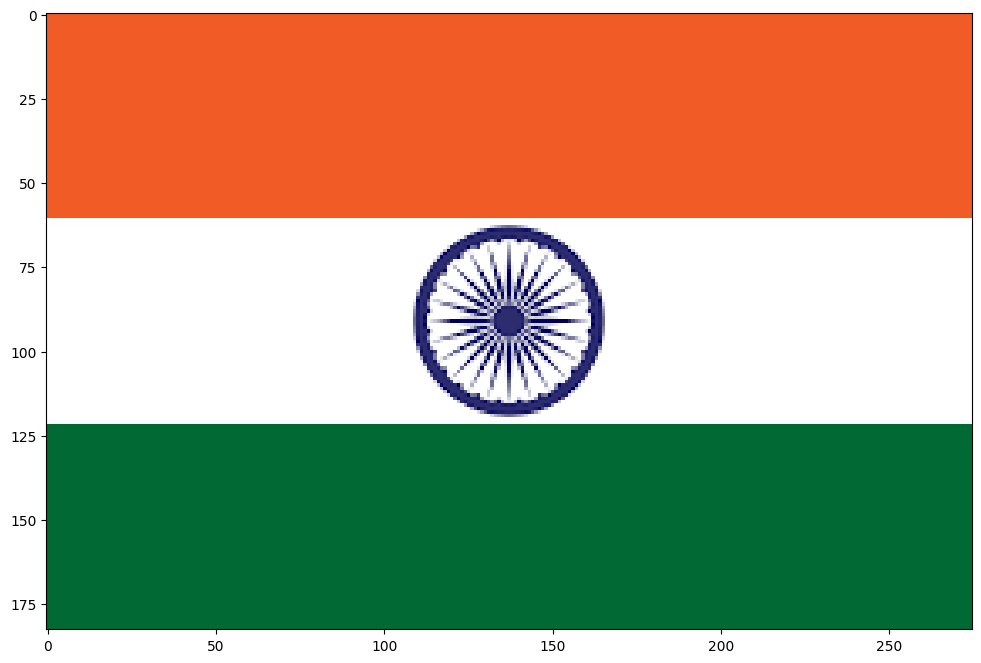

In [22]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("flag.png")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(183, 275)
1.0


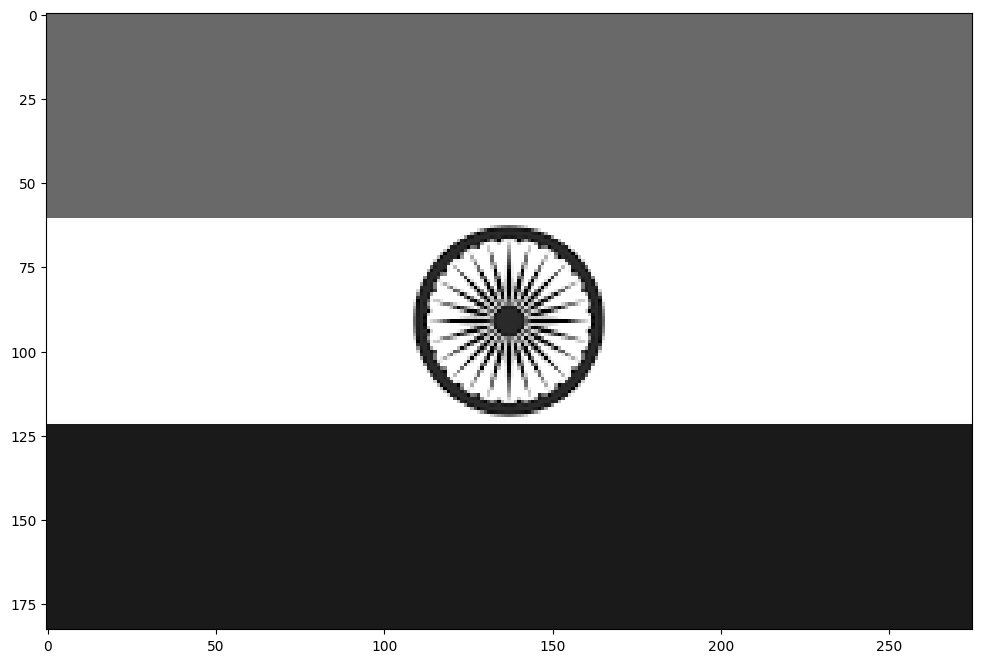

In [23]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [24]:
from sklearn.decomposition import PCA

def plot_at_k(k):
  pca = PCA(n_components = k)
  pca.fit(image_bw)
  transformed_image = pca.transform(image_bw)
  reconstructed_image = pca.inverse_transform(transformed_image)
  reconstructed_image = reconstructed_image.reshape(image_bw.shape)
  plt.imshow(reconstructed_image, cmap='gray')


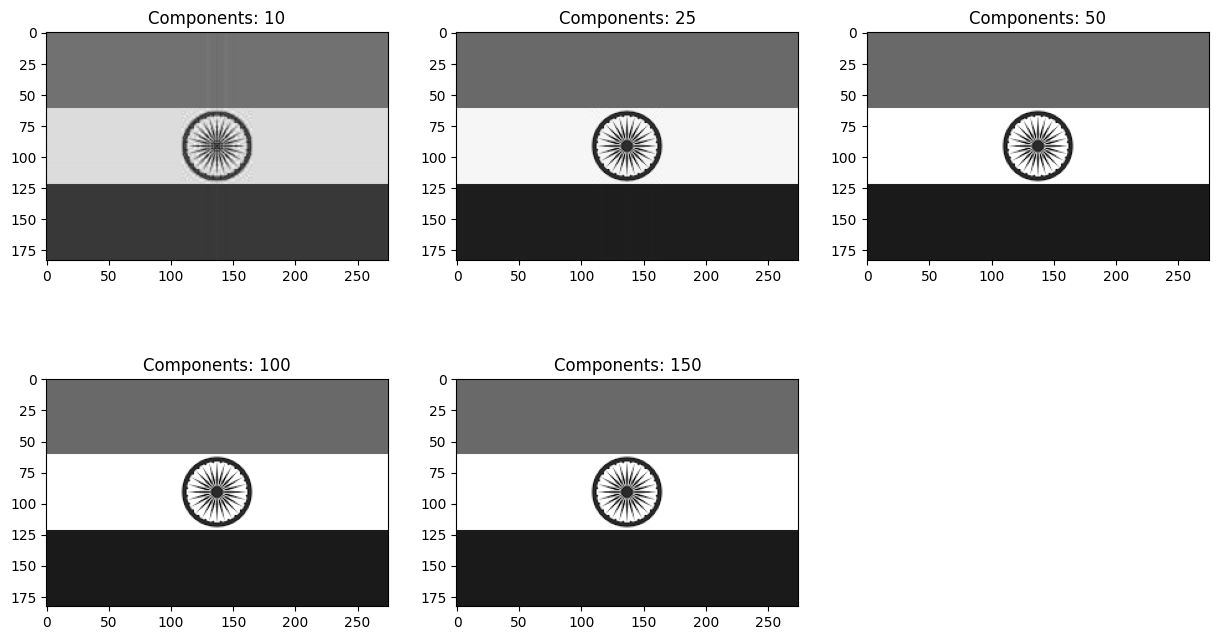

In [25]:
ks = [10, 25, 50, 100, 150]

plt.figure(figsize=[15,9])

for i in range(5):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()